<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

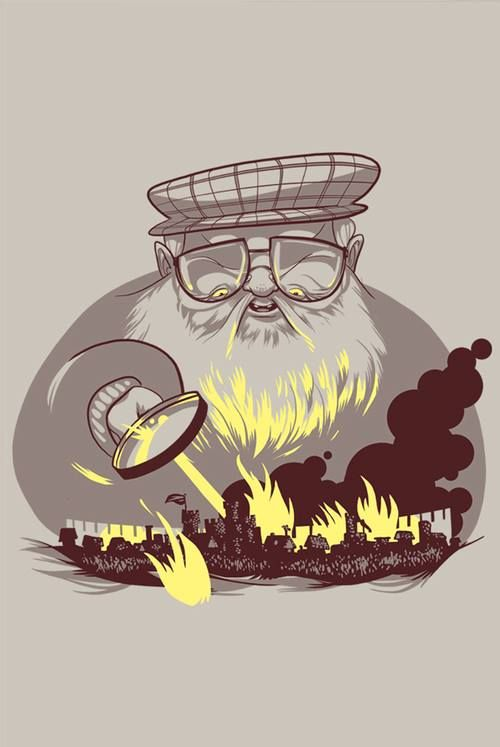

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [328]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /Users/glebpankeev/Desktop/DLS/DLS2024-2025/SemCV1PanMatlSkl/game_of_thrones_test.csv
100%|███████████████████████████████████████| 37.3k/37.3k [00:00<00:00, 604kB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /Users/glebpankeev/Desktop/DLS/DLS2024-2025/SemCV1PanMatlSkl/game_of_thrones_train.csv
100%|█████████████████████████████████████████| 138k/138k [00:00<00:00, 744kB/s]


In [ ]:
рио

**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [589]:
#  Импортируем библиотеки pandas, matplotlib, seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [590]:
data = pd.read_csv('game_of_thrones_train.csv', index_col = 'S.No')

In [591]:
for column_name, column_data in data.items():
    na_percentage = round((column_data.isna().sum() / len(column_data)) * 100, 3)
    print(f'{column_name}: {na_percentage} % пропущенных данных')

name: 0.0 % пропущенных данных
title: 53.95 % пропущенных данных
male: 0.0 % пропущенных данных
culture: 68.658 % пропущенных данных
dateOfBirth: 82.081 % пропущенных данных
mother: 98.844 % пропущенных данных
father: 98.587 % пропущенных данных
heir: 98.651 % пропущенных данных
house: 24.47 % пропущенных данных
spouse: 87.155 % пропущенных данных
book1: 0.0 % пропущенных данных
book2: 0.0 % пропущенных данных
book3: 0.0 % пропущенных данных
book4: 0.0 % пропущенных данных
book5: 0.0 % пропущенных данных
isAliveMother: 98.844 % пропущенных данных
isAliveFather: 98.587 % пропущенных данных
isAliveHeir: 98.651 % пропущенных данных
isAliveSpouse: 87.155 % пропущенных данных
isMarried: 0.0 % пропущенных данных
isNoble: 0.0 % пропущенных данных
age: 82.081 % пропущенных данных
numDeadRelations: 0.0 % пропущенных данных
popularity: 0.0 % пропущенных данных
isAlive: 0.0 % пропущенных данных


**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [592]:
drop_column_list = [ 'mother','father', 'heir',
       'isAliveMother', 'isAliveFather', 'isAliveHeir', 'dateOfBirth', 'name', 'spouse']
data.drop(columns=drop_column_list, inplace=True)

In [593]:
data.columns

Index(['title', 'male', 'culture', 'house', 'book1', 'book2', 'book3', 'book4',
       'book5', 'isAliveSpouse', 'isMarried', 'isNoble', 'age',
       'numDeadRelations', 'popularity', 'isAlive'],
      dtype='object')

In [594]:
for column_name, column_data in data.items():
    na_percentage = round((column_data.isna().sum() / len(column_data)) * 100, 3)
    print(f'{column_name}: {na_percentage} % пропущенных данных')


title: 53.95 % пропущенных данных
male: 0.0 % пропущенных данных
culture: 68.658 % пропущенных данных
house: 24.47 % пропущенных данных
book1: 0.0 % пропущенных данных
book2: 0.0 % пропущенных данных
book3: 0.0 % пропущенных данных
book4: 0.0 % пропущенных данных
book5: 0.0 % пропущенных данных
isAliveSpouse: 87.155 % пропущенных данных
isMarried: 0.0 % пропущенных данных
isNoble: 0.0 % пропущенных данных
age: 82.081 % пропущенных данных
numDeadRelations: 0.0 % пропущенных данных
popularity: 0.0 % пропущенных данных
isAlive: 0.0 % пропущенных данных


In [595]:


# Отдельно заменим NaN на 'Rare'
data['title'] = data['title'].fillna('Rare')
data['culture'] = data['culture'].fillna('Outliers')
data['house'] = data['house'].fillna('Uncommon')
data['isAliveSpouse'] = data['isAliveSpouse'].fillna(1)
data['age'] = data['age'].fillna(35.29)

# Проверим результат

**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [596]:
# Подсказка
#Упростите признак culture, объединив схожие названия в один.
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

# Переворачиваем словарь для обратного поиска (когда по значению можно найти ключ)
reverse_cult = {alias: key for key, aliases in cult.items() for alias in aliases}

data['culture'] = data['culture'].apply(lambda x: reverse_cult[x.lower()] if x.lower() in reverse_cult.keys() else 'Outliers' )


sorted(data['culture'].unique())

['Andal',
 'Braavosi',
 'Dornish',
 'Free Folk',
 'Ghiscari',
 'Lysene',
 'Myrish',
 'Northmen',
 'Norvoshi',
 'Outliers',
 'Qartheen',
 'Reach',
 'Stormlander',
 'Summer Islands',
 'Westermen',
 'Westerosi']

**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

In [598]:
# ...


plt.figure(figsize = (10, 5))

df['isAlive'].hist(density=False, bins=20)
plt.ylabel('count')
plt.xlabel('isAlive')

plt.suptitle('Distribution of isAlive')
plt.show()

KeyError: 'isAlive'

<Figure size 1000x500 with 0 Axes>

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [410]:


df = data


from sklearn.preprocessing import LabelEncoder

# Инициализируем LabelEncoder
label_encoder = LabelEncoder()

# Применяем label encoding к столбцу 'house'
df['culture_encoded'] = label_encoder.fit_transform(df['culture'])

# Удаляем старый столбец 'house'
df.drop(columns=['culture'], inplace=True)




from sklearn.preprocessing import LabelEncoder

# Инициализируем LabelEncoder
label_encoder = LabelEncoder()

# Применяем label encoding к столбцу 'house'
df['house_encoded'] = label_encoder.fit_transform(df['house'])

# Удаляем старый столбец 'house'
df.drop(columns=['house'], inplace=True)




from sklearn.preprocessing import LabelEncoder

# Инициализируем LabelEncoder
label_encoder = LabelEncoder()

# Применяем label encoding к столбцу 'house'
df['title_encoded'] = label_encoder.fit_transform(df['title'])

# Удаляем старый столбец 'house'
df.drop(columns=['title'], inplace=True)



df

,male,book1,book2,book3,book4,book5,isAliveSpouse,isMarried,isNoble,age,isAlive,isPopular,boolDeadRelations,culture_encoded,house_encoded,title_encoded
S.No,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,1.0,0,0,35.290323,0,1.0,1.0,9,17,6
2,1,1,1,1,1,1,1.0,1,1,97.000000,1,1.0,1.0,9,6,6
3,1,0,0,0,1,0,1.0,0,1,35.290323,1,0.0,0.0,9,17,9
4,0,0,0,0,0,0,0.0,1,1,23.000000,0,0.0,0.0,9,1,6
5,0,0,0,0,1,0,1.0,1,1,29.000000,1,0.0,0.0,2,17,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,1,1,0,1,1,0,1.0,0,1,35.290323,1,0.0,0.0,9,17,0
1554,0,1,1,0,0,0,1.0,0,0,35.290323,0,0.0,0.0,9,17,6
1555,1,0,1,1,1,1,1.0,0,0,35.290323,0,0.0,0.0,9,17,6


In [485]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Создаем экземпляр OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Для каждой категориальной переменной применим One-Hot Encoding
categorical_columns = ['culture', 'house', 'title']

# Применяем One-Hot Encoding к каждой категориальной переменной
for column in categorical_columns:
    # Применяем one-hot encoding к столбцу
    one_hot_encoded = encoder.fit_transform(df[[column]])

    # Создаем DataFrame с закодированными столбцами
    one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out([column]), index=df.index)

    # Добавляем закодированные столбцы в исходный DataFrame
    df = pd.concat([df, one_hot_df], axis=1)

    # Удаляем старый столбец
    df.drop(columns=[column], inplace=True)

# Проверяем результат
print(df.head())


      male  book1  book2  book3  book4  book5  isAliveSpouse  isMarried  \
S.No                                                                      
1        1      0      0      0      0      0            1.0          0   
2        1      1      1      1      1      1            1.0          1   
3        1      0      0      0      1      0            1.0          0   
4        0      0      0      0      0      0            0.0          1   
5        0      0      0      0      1      0            1.0          1   

      isNoble        age  ...  title_King in the North  title_Lady  \
S.No                      ...                                        
1           0  35.290323  ...                      0.0         0.0   
2           1  97.000000  ...                      0.0         0.0   
3           1  35.290323  ...                      0.0         0.0   
4           1  23.000000  ...                      0.0         0.0   
5           1  29.000000  ...                      0.0

In [487]:
#df['house_encoded'].value_counts()

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

Корреляция — мера линейной зависимости признаков друг от друга. Сильно скоррелированные признаки могут иметь негативный эффект на обучение линейных моделей. Если в датасете есть сильно скоррелированные признаки, и вы хотите использовать линейную модель машинного обучения, 
то от таких признаков нужно избавляться. Делать это можно несколькими способами:

Оставляя один из признаков


Соединив признак в один и создав новый признак



Сделать нелинейное преобразование признаков
изображение.png
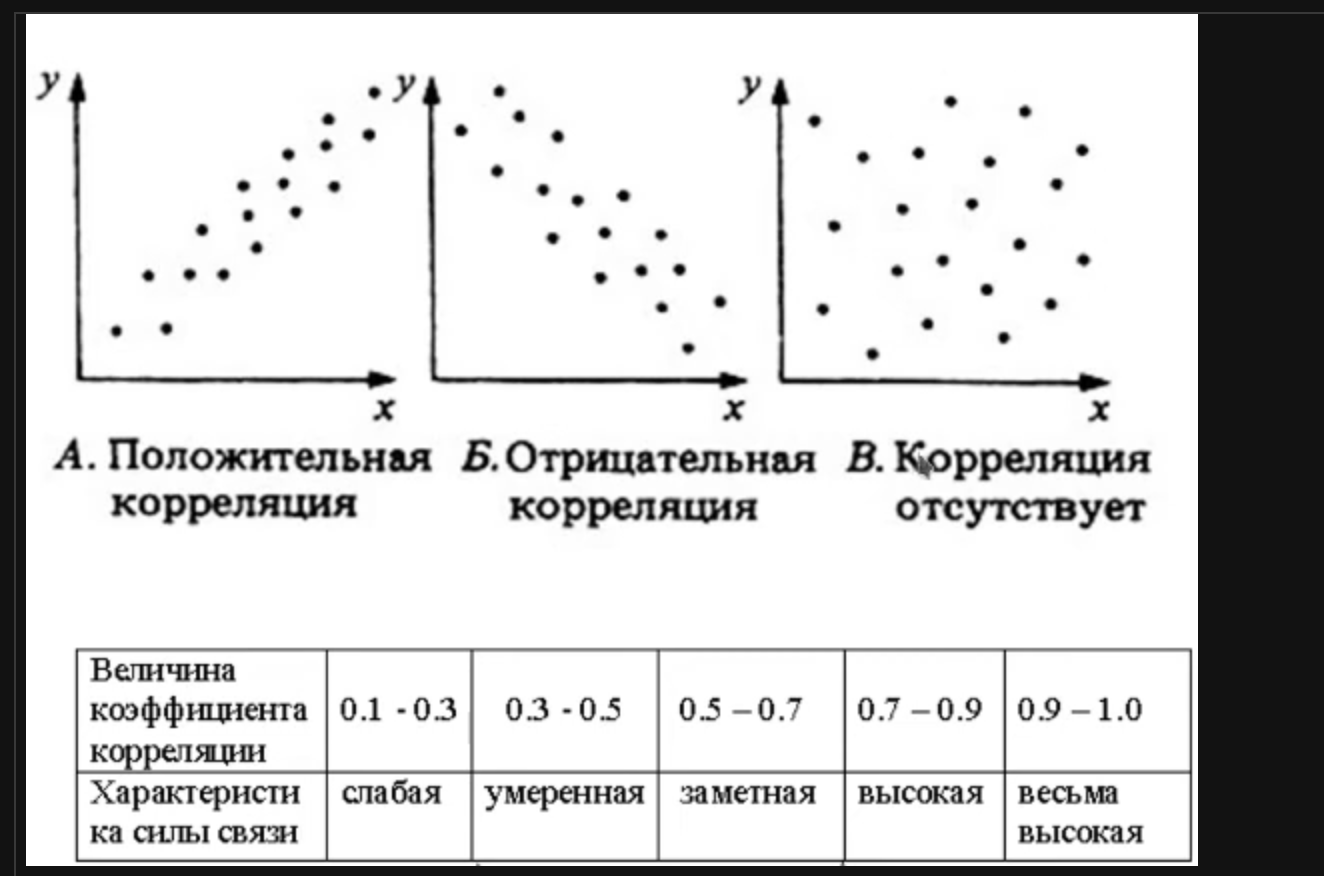

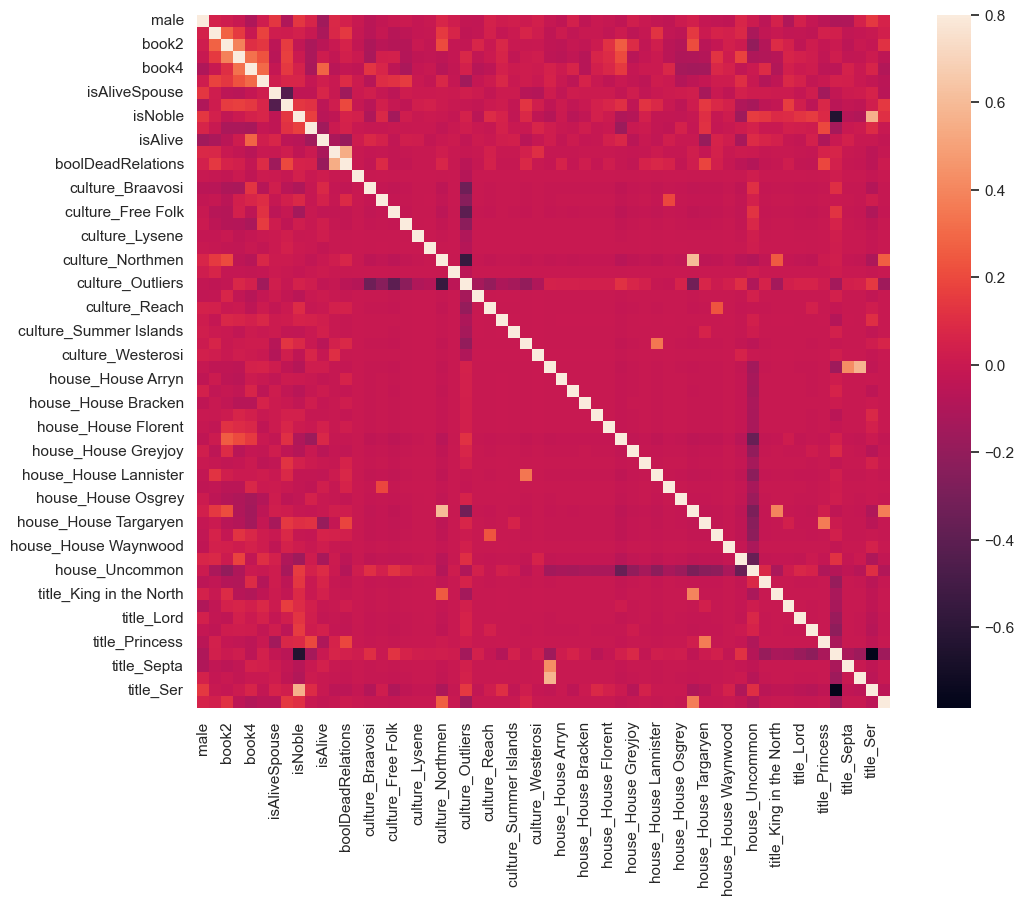

In [488]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

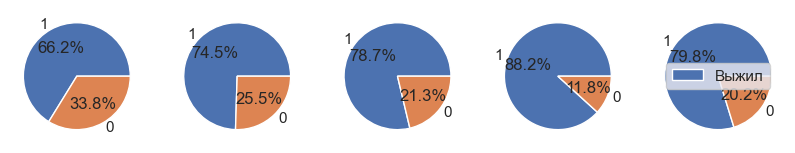

In [413]:
# Готовим данные для графика
data1 = df[df['book1'] == 1]['isAlive'].value_counts()
data2 = df[df['book2'] == 1]['isAlive'].value_counts()
data3 = df[df['book3'] == 1]['isAlive'].value_counts()
data4 = df[df['book4'] == 1]['isAlive'].value_counts()
data5 = df[df['book5'] == 1]['isAlive'].value_counts()

# Строим круговую диаграмму
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(10,8))

ax1.pie(data1.values, labels=data1.index, autopct='%1.1f%%')
ax2.pie(data2.values, labels=data2.index, autopct='%1.1f%%')
ax3.pie(data3.values, labels=data3.index, autopct='%1.1f%%')
ax4.pie(data4.values, labels=data4.index, autopct='%1.1f%%')
ax5.pie(data5.values, labels=data5.index, autopct='%1.1f%%')



plt.legend(['Выжил'])

plt.show()

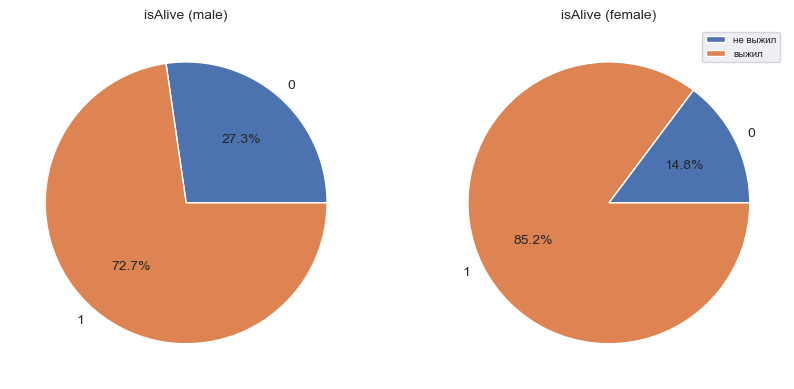

In [414]:



# female - 0, male - 1
data_1 = df[df['male']== 1]['isAlive'].value_counts().sort_values()
data_2 = df[df['male']== 0]['isAlive'].value_counts().sort_values()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))

ax1.pie(data_1.values, labels=data_1.index, autopct='%1.1f%%', textprops={'fontsize': 10})
ax2.pie(data_2.values, labels=data_2.index, autopct='%1.1f%%', textprops={'fontsize': 10})

ax1.set_title('isAlive (male)', fontsize=10)
ax2.set_title('isAlive (female)', fontsize=10)

plt.legend(['не выжил', 'выжил'], fontsize=7)

plt.show()

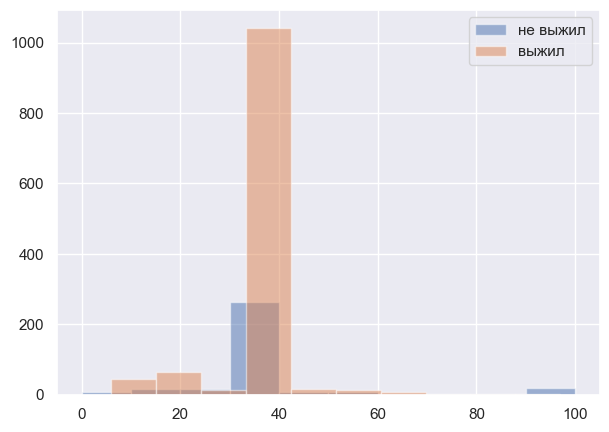

In [415]:
plt.figure(figsize=(7, 5))

plt.hist(df['age'][df['isAlive'] == 0], alpha=0.5, label='не выжил')
plt.hist(df['age'][df['isAlive'] == 1], alpha=0.5, label='выжил')

plt.legend()

plt.show()

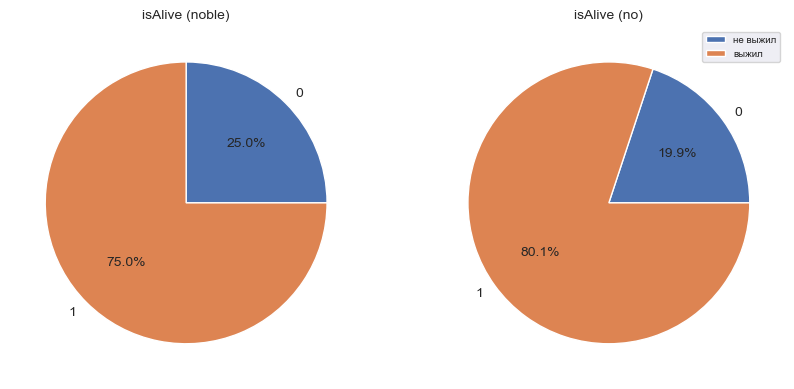

In [416]:
# Строим боксплот
# Готовим данные для графика



# female - 0, male - 1
data_1 = df[df['isNoble']== 1]['isAlive'].value_counts().sort_values()
data_2 = df[df['isNoble']== 0]['isAlive'].value_counts().sort_values()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))

ax1.pie(data_1.values, labels=data_1.index, autopct='%1.1f%%', textprops={'fontsize': 10})
ax2.pie(data_2.values, labels=data_2.index, autopct='%1.1f%%', textprops={'fontsize': 10})

ax1.set_title('isAlive (noble)', fontsize=10)
ax2.set_title('isAlive (no)', fontsize=10)

plt.legend(['не выжил', 'выжил'], fontsize=7)

plt.show()

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [489]:
df.head()
df.columns

Index(['male', 'book1', 'book2', 'book3', 'book4', 'book5', 'isAliveSpouse',
       'isMarried', 'isNoble', 'age', 'isAlive', 'isPopular',
       'boolDeadRelations', 'culture_Andal', 'culture_Braavosi',
       'culture_Dornish', 'culture_Free Folk', 'culture_Ghiscari',
       'culture_Lysene', 'culture_Myrish', 'culture_Northmen',
       'culture_Norvoshi', 'culture_Outliers', 'culture_Qartheen',
       'culture_Reach', 'culture_Stormlander', 'culture_Summer Islands',
       'culture_Westermen', 'culture_Westerosi', 'house_Faith of the Seven',
       'house_House Arryn', 'house_House Botley', 'house_House Bracken',
       'house_House Crakehall', 'house_House Florent', 'house_House Frey',
       'house_House Greyjoy', 'house_House Hightower', 'house_House Lannister',
       'house_House Martell', 'house_House Osgrey', 'house_House Stark',
       'house_House Targaryen', 'house_House Tyrell', 'house_House Waynwood',
       'house_Night's Watch', 'house_Uncommon', 'title_Archmaester',
 

In [490]:
X = df.drop(columns=['isAlive']).values
y = df['isAlive'].values


**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [491]:
from sklearn.model_selection import train_test_split

In [492]:
X_train, X_test, y_train, y_test = train_test_split (X,y, test_size = 0.2 ,shuffle = True)

In [493]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
# Выход pca - numpy матрица, положим ее в новую переменную со всеми фичами
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [494]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [495]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [496]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1)

# Шаг 2. обучение модели
logistic_regression.fit(X_train_scaled, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test_scaled)

Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [497]:
# Шаг 1. создание модели
adaboost_classifier =  AdaBoostClassifier()

# Шаг 2. обучение модели
adaboost_classifier.fit(X_train_scaled, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = adaboost_classifier.predict(X_test_scaled)

In [498]:
# Шаг 1. создание модели
RandomForest_classifier =  RandomForestClassifier()

# Шаг 2. обучение модели
RandomForest_classifier.fit(X_train_scaled, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = RandomForest_classifier.predict(X_test_scaled)

In [499]:
# Шаг 1. создание модели
gaussp_classifier = GaussianProcessClassifier()

# Шаг 2. обучение модели
gaussp_classifier.fit(X_train_scaled, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = gaussp_classifier.predict(X_test_scaled)

In [500]:
# Шаг 1. создание модели
Gaussian_NB =  GaussianNB()

# Шаг 2. обучение модели
Gaussian_NB.fit(X_train_scaled, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = Gaussian_NB.predict(X_test_scaled)

In [501]:
# Шаг 1. создание модели
KNN =  KNeighborsClassifier()

# Шаг 2. обучение модели
KNN.fit(X_train_scaled, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = KNN.predict(X_test_scaled)

In [502]:
# Шаг 1. создание модели
SVC =  SVC()

# Шаг 2. обучение модели
SVC.fit(X_train_scaled, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = SVC.predict(X_test_scaled)

In [503]:
# Шаг 1. создание модели
DTC =  DecisionTreeClassifier()

# Шаг 2. обучение модели
DTC.fit(X_train_scaled, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = DTC.predict(X_test_scaled)

## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [504]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [505]:
# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test_scaled)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7917


Аналогичным образом посчитайте метрику accuracy для остальных моделей

 Является адаптивным в том смысле, что каждый следующий ансамбль классификаторов 
строится по объектам, неверно классифицированным предыдущими. 1

AdaBoost присваивает веса экземплярам на основе их правильной 
или неправильной классификации. Он объединяет слабые экземпляры 
с помощью взвешенной суммы.
Последняя сильная модель представляет собой линейную комбинацию слабых,
веса которых определяются в процессе обучения. 3

AdaBoost может использоваться в сочетании с несколькими алгоритмами классификации
для улучшения их эффективности. Он чувствителен к шуму в данных и выбросам, однако
менее подвержен переобучению по сравнению с другими алгоритмами машинного обучения

In [506]:
# Шаг 3. Предсказание на тестовых данных
y_pred = adaboost_classifier.predict(X_test_scaled)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)

# Шаг 4. Оценка предсказания по метрике accuracy

print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7949


(случайый лес)Суть алгоритма: он создаёт множество решающих деревьев 
и использует их для предсказания классов объектов. 
Каждое дерево строится на случайном подмножестве обучающих 
данных и случайном подмножестве признаков. В результате, каждое дерево в ансамбле получается немного 
разным, что позволяет уменьшить эффект переобучения и повысить качество предсказаний.

In [507]:
# Шаг 3. Предсказание на тестовых данных
y_pred = RandomForest_classifier.predict(X_test_scaled)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)

# Шаг 4. Оценка предсказания по метрике accuracy

print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7949


GaussianProcessClassifier — это класс для выполнения классификации н
а основе гауссовского процесса (GPC) в библиотеке Scikit-Learn. 

GPC — вероятностный подход к классификации, который моделирует 
условное распределение меток классов при заданных значениях признаков.

In [508]:
# Шаг 3. Предсказание на тестовых данных
y_pred = gaussp_classifier.predict(X_test_scaled)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)

# Шаг 4. Оценка предсказания по метрике accuracy

print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7788


Gaussian Naive Bayes (GNB) — это метод классификации,
используемый в машинном обучении на основе вероятностного подхода и гауссовского распределения.

Он предполагает, что каждый параметр, также известный как особенности 
или предиктор, обладает независимой способностью предсказывать выходную переменную.

Метод позволяет предсказать вероятность того, что зависимая переменная 
будет классифицирована в каждой группе.

Результатом комбинации прогнозов для всех параметров является 
окончательный прогноз, который возвращает вероятность того, 
что зависимая переменная будет классифицирована в каждой группе.

Окончательная классификация присваивается группе с более высокой вероятностью.

In [509]:
# Шаг 3. Предсказание на тестовых данных
y_pred = Gaussian_NB.predict(X_test_scaled)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)

# Шаг 4. Оценка предсказания по метрике accuracy

print("Accuracy : %.4f" % accuracy)

Accuracy : 0.3141


In [510]:
# Шаг 3. Предсказание на тестовых данных
y_pred = KNN.predict(X_test_scaled)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)

# Шаг 4. Оценка предсказания по метрике accuracy

print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7692


Метод опорных векторов (SVM) (от англ. Support Vector Machines) — это линейный алгоритм, 
используемый в задачах классификации и регрессии.

Он создаёт линию или гиперплоскость, которая разделяет данные на классы.

Алгоритм SVM находит точки на графике, которые расположены 
ближе всего к линии разделения. Эти точки называются опорными векторами.
Затем алгоритм вычисляет расстояние между опорными векторами и разделяющей плоскостью.

Основная цель алгоритма — максимизировать расстояние зазора. 
Лучшей гиперплоскостью считается такая гиперплоскость, для которой этот зазор является максимально большим.

In [511]:
# Шаг 3. Предсказание на тестовых данных
y_pred = SVC.predict(X_test_scaled)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)

# Шаг 4. Оценка предсказания по метрике accuracy

print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7853


In [512]:
# Шаг 3. Предсказание на тестовых данных
y_pred = DTC.predict(X_test_scaled)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)

# Шаг 4. Оценка предсказания по метрике accuracy

print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7660


Выберите лучшую модель.

In [513]:
# Шаг 1. создание модели
adaboost_classifier =  AdaBoostClassifier()

# Шаг 2. обучение модели
adaboost_classifier.fit(X_train_scaled, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = adaboost_classifier.predict(X_test_scaled)

In [514]:
# Шаг 3. Предсказание на тестовых данных
y_pred = gaussp_classifier.predict(X_test_scaled)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)

# Шаг 4. Оценка предсказания по метрике accuracy

print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7788


In [130]:
from sklearn.model_selection import GridSearchCV

In [132]:
# save the model to disk
import pickle

filename = 'finalized_model1.sav'
pickle.dump(model, open(filename, 'wb'))

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

In [279]:
# save the model to disk
##
#
#
#
import pickle

filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

In [547]:
data = pd.read_csv('game_of_thrones_test.csv', index_col = 'S.No')

data.columns

Index(['name', 'title', 'male', 'culture', 'dateOfBirth', 'mother', 'father',
       'heir', 'house', 'spouse', 'book1', 'book2', 'book3', 'book4', 'book5',
       'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse',
       'isMarried', 'isNoble', 'age', 'numDeadRelations', 'popularity'],
      dtype='object')

In [548]:
for column_name, column_data in data.items():
    na_percentage = round((column_data.isna().sum() / len(column_data)) * 100, 3)
    print(f'{column_name}: {na_percentage} % пропущенных данных')

name: 0.0 % пропущенных данных
title: 43.188 % пропущенных данных
male: 0.0 % пропущенных данных
culture: 51.414 % пропущенных данных
dateOfBirth: 60.411 % пропущенных данных
mother: 99.229 % пропущенных данных
father: 98.972 % пропущенных данных
heir: 99.486 % пропущенных данных
house: 11.825 % пропущенных данных
spouse: 80.463 % пропущенных данных
book1: 0.0 % пропущенных данных
book2: 0.0 % пропущенных данных
book3: 0.0 % пропущенных данных
book4: 0.0 % пропущенных данных
book5: 0.0 % пропущенных данных
isAliveMother: 99.229 % пропущенных данных
isAliveFather: 98.972 % пропущенных данных
isAliveHeir: 99.486 % пропущенных данных
isAliveSpouse: 80.463 % пропущенных данных
isMarried: 0.0 % пропущенных данных
isNoble: 0.0 % пропущенных данных
age: 60.411 % пропущенных данных
numDeadRelations: 0.0 % пропущенных данных
popularity: 0.0 % пропущенных данных


In [549]:




#drop_column_list = [ 'title', 'male', 'culture', 'house', 'book1', 'book2', 'book3', 'book4', 'book5',
    #  'isMarried', 'isNoble', 'numDeadRelations', 'popularity',
drop_column_list = [ 'mother','father', 'heir',
       'isAliveMother', 'isAliveFather', 'isAliveHeir', 'dateOfBirth', 'name', 'spouse']
data.drop(columns=drop_column_list, inplace=True)

In [550]:


# Отдельно заменим NaN на 'Rare'
data['title'] = data['title'].fillna('Rare')
data['culture'] = data['culture'].fillna('Outliers')
data['house'] = data['house'].fillna('Uncommon')
data['isAliveSpouse'] = data['isAliveSpouse'].fillna(1)





house_counts = data['house'].value_counts()

# Определяем дома, которые встречаются один раз
rare_houses = house_counts[house_counts <= 8].index

# Заменяем редкие дома (встречающиеся 1 раз) на 'Uncommon'
data['house'] = data['house'].replace(rare_houses, 'Uncommon')



# Находим количество встречаемых значений для каждого дома
house_counts = data['title'].value_counts()

# Определяем дома, которые встречаются один раз
rare_title = house_counts[house_counts <= 8].index

# Заменяем редкие дома (встречающиеся 1 раз) на 'Uncommon'
data['title'] = data['title'].replace(rare_title, 'Rare')

In [551]:
# Шаг 1: Находим среднее значение для строк, где 'age' >= 0
mean_age = data['age'][(data['age'].notna()) & (data['age'] >= 0)].mean()

# Шаг 2: Заменяем значения, которые NaN или меньше 0, на найденное среднее
data['age'] = data['age'].apply(lambda x: mean_age if pd.isna(x) or x < 0 else x)

# Проверяем результат
print(data)


     title  male     culture            house  book1  book2  book3  book4  \
S.No                                                                        
1558  Rare     0    Outliers         Uncommon      0      0      0      0   
1559  Rare     0      Asshai         Uncommon      0      1      1      1   
1560  Rare     0    Outliers         Uncommon      0      0      1      1   
1561   Ser     1    Outliers         Uncommon      1      1      1      1   
1562  Rare     1  Riverlands         Uncommon      1      1      1      1   
...    ...   ...         ...              ...    ...    ...    ...    ...   
1942  Rare     1    Westeros      House Stark      1      1      1      1   
1943  Rare     1    Outliers         Uncommon      0      1      0      1   
1944  Rare     1    Outliers         Uncommon      1      1      1      1   
1945  Rare     1    Outliers         Uncommon      0      0      1      1   
1946  Rare     1    Outliers  House Lannister      0      0      1      1   

In [552]:
data['isPopular'] = np.where(data['popularity'] >= 0.5, 1.0, 0.0)

drop_column_list = ['popularity']
data.drop(columns=drop_column_list, inplace=True)
data


,title,male,culture,house,book1,book2,book3,book4,book5,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,isPopular
S.No,,,,,,,,,,,,,,,
1558,Rare,0,Outliers,Uncommon,0,0,0,0,1,1.0,0,0,100.000000,0,0.0
1559,Rare,0,Asshai,Uncommon,0,1,1,1,1,1.0,0,0,39.618421,0,1.0
1560,Rare,0,Outliers,Uncommon,0,0,1,1,0,1.0,0,0,39.618421,0,0.0
1561,Ser,1,Outliers,Uncommon,1,1,1,1,1,1.0,0,1,39.618421,0,0.0
1562,Rare,1,Riverlands,Uncommon,1,1,1,1,1,1.0,1,0,38.000000,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,Rare,1,Westeros,House Stark,1,1,1,1,1,1.0,0,0,39.618421,0,0.0
1943,Rare,1,Outliers,Uncommon,0,1,0,1,1,1.0,0,0,39.618421,0,0.0
1944,Rare,1,Outliers,Uncommon,1,1,1,1,1,1.0,0,0,39.618421,0,0.0


In [553]:
data['boolDeadRelations'] = np.where(data['numDeadRelations'] > 0, 1.0, 0.0)

data[['boolDeadRelations','numDeadRelations']]
drop_column_list = ['numDeadRelations']
data.drop(columns=drop_column_list, inplace=True)
data

,title,male,culture,house,book1,book2,book3,book4,book5,isAliveSpouse,isMarried,isNoble,age,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,
1558,Rare,0,Outliers,Uncommon,0,0,0,0,1,1.0,0,0,100.000000,0.0,0.0
1559,Rare,0,Asshai,Uncommon,0,1,1,1,1,1.0,0,0,39.618421,1.0,0.0
1560,Rare,0,Outliers,Uncommon,0,0,1,1,0,1.0,0,0,39.618421,0.0,0.0
1561,Ser,1,Outliers,Uncommon,1,1,1,1,1,1.0,0,1,39.618421,0.0,0.0
1562,Rare,1,Riverlands,Uncommon,1,1,1,1,1,1.0,1,0,38.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,Rare,1,Westeros,House Stark,1,1,1,1,1,1.0,0,0,39.618421,0.0,0.0
1943,Rare,1,Outliers,Uncommon,0,1,0,1,1,1.0,0,0,39.618421,0.0,0.0
1944,Rare,1,Outliers,Uncommon,1,1,1,1,1,1.0,0,0,39.618421,0.0,0.0


In [554]:
# Подсказка
#Упростите признак culture, объединив схожие названия в один.
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

# Переворачиваем словарь для обратного поиска (когда по значению можно найти ключ)
reverse_cult = {alias: key for key, aliases in cult.items() for alias in aliases}

data['culture'] = data['culture'].apply(lambda x: reverse_cult[x.lower()] if x.lower() in reverse_cult.keys() else 'Outliers' )


sorted(data['culture'].unique())

['Asshai',
 'Braavosi',
 'Dornish',
 'Free Folk',
 'Ghiscari',
 'Lysene',
 'Myrish',
 'Northmen',
 'Norvoshi',
 'Outliers',
 'Qartheen',
 'Reach',
 'Stormlander',
 'Summer Islands',
 'Westermen',
 'Westerosi']

In [555]:
for column_name, column_data in data.items():
    na_percentage = round((column_data.isna().sum() / len(column_data)) * 100, 3)
    print(f'{column_name}: {na_percentage} % пропущенных данных')

title: 0.0 % пропущенных данных
male: 0.0 % пропущенных данных
culture: 0.0 % пропущенных данных
house: 0.0 % пропущенных данных
book1: 0.0 % пропущенных данных
book2: 0.0 % пропущенных данных
book3: 0.0 % пропущенных данных
book4: 0.0 % пропущенных данных
book5: 0.0 % пропущенных данных
isAliveSpouse: 0.0 % пропущенных данных
isMarried: 0.0 % пропущенных данных
isNoble: 0.0 % пропущенных данных
age: 0.0 % пропущенных данных
isPopular: 0.0 % пропущенных данных
boolDeadRelations: 0.0 % пропущенных данных


In [558]:
df

,male,book1,book2,book3,book4,book5,isAliveSpouse,isMarried,isNoble,age,isPopular,boolDeadRelations,culture_encoded,house_encoded,title_encoded
S.No,,,,,,,,,,,,,,,
1558,0,0,0,0,0,1,1.0,0,0,100.000000,0.0,0.0,9,7,1
1559,0,0,1,1,1,1,1.0,0,0,39.618421,1.0,0.0,0,7,1
1560,0,0,0,1,1,0,1.0,0,0,39.618421,0.0,0.0,9,7,1
1561,1,1,1,1,1,1,1.0,0,1,39.618421,0.0,0.0,9,7,2
1562,1,1,1,1,1,1,1.0,1,0,38.000000,0.0,0.0,9,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,1,1,1,1,1,1,1.0,0,0,39.618421,0.0,0.0,15,4,1
1943,1,0,1,0,1,1,1.0,0,0,39.618421,0.0,0.0,9,7,1
1944,1,1,1,1,1,1,1.0,0,0,39.618421,0.0,0.0,9,7,1


In [535]:


df = data


from sklearn.preprocessing import LabelEncoder

# Инициализируем LabelEncoder
label_encoder = LabelEncoder()

# Применяем label encoding к столбцу 'house'
df['culture_encoded'] = label_encoder.fit_transform(df['culture'])

# Удаляем старый столбец 'house'
df.drop(columns=['culture'], inplace=True)




from sklearn.preprocessing import LabelEncoder

# Инициализируем LabelEncoder
label_encoder = LabelEncoder()

# Применяем label encoding к столбцу 'house'
df['house_encoded'] = label_encoder.fit_transform(df['house'])

# Удаляем старый столбец 'house'
df.drop(columns=['house'], inplace=True)




from sklearn.preprocessing import LabelEncoder

# Инициализируем LabelEncoder
label_encoder = LabelEncoder()

# Применяем label encoding к столбцу 'house'
df['title_encoded'] = label_encoder.fit_transform(df['title'])

# Удаляем старый столбец 'house'
df.drop(columns=['title'], inplace=True)



df

,male,book1,book2,book3,book4,book5,isAliveSpouse,isMarried,isNoble,age,isPopular,boolDeadRelations,culture_encoded,house_encoded,title_encoded
S.No,,,,,,,,,,,,,,,
1558,0,0,0,0,0,1,1.0,0,0,100.000000,0.0,0.0,9,7,1
1559,0,0,1,1,1,1,1.0,0,0,39.618421,1.0,0.0,0,7,1
1560,0,0,0,1,1,0,1.0,0,0,39.618421,0.0,0.0,9,7,1
1561,1,1,1,1,1,1,1.0,0,1,39.618421,0.0,0.0,9,7,2
1562,1,1,1,1,1,1,1.0,1,0,38.000000,0.0,0.0,9,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,1,1,1,1,1,1,1.0,0,0,39.618421,0.0,0.0,15,4,1
1943,1,0,1,0,1,1,1.0,0,0,39.618421,0.0,0.0,9,7,1
1944,1,1,1,1,1,1,1.0,0,0,39.618421,0.0,0.0,9,7,1


In [559]:
df = data

from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Создаем экземпляр OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Для каждой категориальной переменной применим One-Hot Encoding
categorical_columns = ['culture', 'house', 'title']

# Применяем One-Hot Encoding к каждой категориальной переменной
for column in categorical_columns:
    # Применяем one-hot encoding к столбцу
    one_hot_encoded = encoder.fit_transform(df[[column]])

    # Создаем DataFrame с закодированными столбцами
    one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out([column]), index=df.index)

    # Добавляем закодированные столбцы в исходный DataFrame
    df = pd.concat([df, one_hot_df], axis=1)

    # Удаляем старый столбец
    df.drop(columns=[column], inplace=True)

# Проверяем результат
print(df.head())


      male  book1  book2  book3  book4  book5  isAliveSpouse  isMarried  \
S.No                                                                      
1558     0      0      0      0      0      1            1.0          0   
1559     0      0      1      1      1      1            1.0          0   
1560     0      0      0      1      1      0            1.0          0   
1561     1      1      1      1      1      1            1.0          0   
1562     1      1      1      1      1      1            1.0          1   

      isNoble         age  ...  house_House Greyjoy  house_House Lannister  \
S.No                       ...                                               
1558        0  100.000000  ...                  0.0                    0.0   
1559        0   39.618421  ...                  0.0                    0.0   
1560        0   39.618421  ...                  0.0                    0.0   
1561        1   39.618421  ...                  0.0                    0.0   
1562  

In [560]:


X_train, X_test, y_train, y_test = train_test_split (X,y, test_size = 0.2 ,shuffle = True)

In [561]:
X = df.values
#y = df['spouse_encoded']


In [562]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
# Выход pca - numpy матрица, положим ее в новую переменную со всеми фичами
X = scaler.transform(X)


# Шаг 2. обучение модели
#logistic_regression.fit(X, y)

# Шаг 3. Предсказание на тестовых данных
#y_pred = logistic_regression.predict(X_test_scaled)

In [563]:
y_pred = adaboost_classifier.predict(X)

ValueError: X has 39 features, but AdaBoostClassifier is expecting 57 features as input.

In [465]:
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [326]:
# Загружаем модель с диска
loaded_model = pickle.load(open('finalized_model.sav', 'rb'))

# Используем загруженную модель для предсказаний или оценки



y_pred = loaded_model.predict(X)

NotFittedError: This AdaBoostClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
y_pred

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [133]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /Users/glebpankeev/Desktop/DLS/DLS2024-2025/SemCV1PanMatlSkl/submission.csv
100%|██████████████████████████████████████| 2.74k/2.74k [00:00<00:00, 5.91MB/s]


In [310]:
submission = pd.read_csv("submission.csv", index_col='S.No')

In [466]:
submission['isAlive'] = y_pred

In [467]:
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [468]:
submission['isAlive']

S.No
1558    0
1559    1
1560    1
1561    1
1562    1
       ..
1942    1
1943    1
1944    1
1945    1
1946    1
Name: isAlive, Length: 389, dtype: int64

Как сохранить измененный Pandas DataFrame в csv файл:

In [469]:
submission.to_csv("new_submission.csv", index=False)

In [614]:
#  Импортируем библиотеки pandas, matplotlib, seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


data = pd.read_csv('game_of_thrones_train.csv', index_col = 'S.No')

In [ ]:
#Index(['name', 'title', 'male', 'culture', 'dateOfBirth', 'mother', 'father',
 #      'heir', 'house', 'spouse', 'book1', 'book2', 'book3', 'book4', 'book5',
  #     'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse',
   #    'isMarried', 'isNoble', 'age', 'numDeadRelations', 'popularity',
    #   'isAlive'],
     # dtype='object')

drop_column_list = [ 'mother','father', 'heir',
       'isAliveMother', 'isAliveFather', 'isAliveHeir', 'dateOfBirth', 'name', 'spouse']
data.drop(columns=drop_column_list, inplace=True)

In [615]:
for column_name, column_data in data.items():
    na_percentage = round((column_data.isna().sum() / len(column_data)) * 100, 3)
    print(f'{column_name}: {na_percentage} % пропущенных данных')

title: 53.95 % пропущенных данных
male: 0.0 % пропущенных данных
culture: 68.658 % пропущенных данных
house: 24.47 % пропущенных данных
book1: 0.0 % пропущенных данных
book2: 0.0 % пропущенных данных
book3: 0.0 % пропущенных данных
book4: 0.0 % пропущенных данных
book5: 0.0 % пропущенных данных
isAliveSpouse: 87.155 % пропущенных данных
isMarried: 0.0 % пропущенных данных
isNoble: 0.0 % пропущенных данных
age: 82.081 % пропущенных данных
numDeadRelations: 0.0 % пропущенных данных
popularity: 0.0 % пропущенных данных
isAlive: 0.0 % пропущенных данных


In [618]:
#mean_age = data['age'][data['age'].notna()].mean()
#mean_age

# Отдельно заменим NaN на 'Rare'
data['title'] = data['title'].fillna('Rare')
data['culture'] = data['culture'].fillna('Outliers')
data['house'] = data['house'].fillna('Uncommon')
data['isAliveSpouse'] = data['isAliveSpouse'].fillna(1)
data['age'] = data['age'].fillna(35.29)

# Проверим результат

In [619]:



house_counts = data['house'].value_counts()

# Определяем дома, которые встречаются один раз
rare_houses = house_counts[house_counts <= 8].index

# Заменяем редкие дома (встречающиеся 1 раз) на 'Uncommon'
data['house'] = data['house'].replace(rare_houses, 'Uncommon')



# Находим количество встречаемых значений для каждого дома
house_counts = data['title'].value_counts()

# Определяем дома, которые встречаются один раз
rare_title = house_counts[house_counts <= 8].index

# Заменяем редкие дома (встречающиеся 1 раз) на 'Uncommon'
data['title'] = data['title'].replace(rare_title, 'Rare')



# Шаг 1: Находим среднее значение для строк, где 'age' >= 0
mean_age = data['age'][(data['age'].notna()) & (data['age'] >= 0)].mean()

# Шаг 2: Заменяем значения, которые NaN или меньше 0, на найденное среднее
data['age'] = data['age'].apply(lambda x: mean_age if pd.isna(x) or x < 0 else x)

# Проверяем результат
print(data)







data['isPopular'] = np.where(data['popularity'] >= 0.5, 1.0, 0.0)

drop_column_list = ['popularity']
data.drop(columns=drop_column_list, inplace=True)
data


,title,male,culture,house,book1,book2,book3,book4,book5,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,
1,Rare,1,Outliers,Uncommon,0,0,0,0,0,1.0,0,0,35.29,11,0.605351,0
2,Lord of the Crossing,1,Rivermen,House Frey,1,1,1,1,1,1.0,1,1,97.00,1,0.896321,1
3,Ser,1,Outliers,House Swyft,0,0,0,1,0,1.0,0,1,35.29,0,0.267559,1
4,Queen,0,Outliers,House Arryn,0,0,0,0,0,0.0,1,1,23.00,0,0.183946,0
5,Greenstone,0,Dornish,House Santagar,0,0,0,1,0,1.0,1,1,29.00,0,0.043478,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Archmaester,1,Outliers,Uncommon,1,0,1,1,0,1.0,0,1,35.29,0,0.160535,1
1554,Rare,0,Outliers,Uncommon,1,1,0,0,0,1.0,0,0,35.29,0,0.040134,0
1555,Rare,1,Outliers,House Seaworth,0,1,1,1,1,1.0,0,0,35.29,0,0.076923,0
